# Linear Regression on House Prices (1D) with Keras

In this notebook we show how to perform linear regression on house prices data, using Keras.

## Define `X_train` and `Y_train`

In [1]:
keras_actif = False # Active Keras ou XGBoost
if keras_actif:
    xgb_actif = False
else:
    xgb_actif = True

In [2]:
import pandas as pd
import numpy as np
from numpy import transpose
from numpy import append
from numpy import reshape
import matplotlib.pyplot as plt
# %matplotlib notebook
import seaborn as sns

np.random.seed(42)
# tf.random.set_seed(42)
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.read_csv('sources/train.csv')
data = data.select_dtypes(exclude=['object'])

data.drop('Id',axis = 1, inplace = True)
data.fillna(0, inplace=True)

In [4]:
# Suppression des outliers
remove_outliers = True
if remove_outliers:
    from sklearn.ensemble import IsolationForest
    
    anomalies_ratio = 0.05
    
    clf = IsolationForest(n_estimators = 100,
                          max_samples = 256,
                          contamination = anomalies_ratio,
                          behaviour= " new",
                          random_state = np.random.RandomState(42))

    clf.fit(data)
    y_noano = clf.predict(data)
    y_noano = pd.DataFrame(y_noano, columns = ['Top'])
    y_noano[y_noano['Top'] == 1].index.values

    data = data.iloc[y_noano[y_noano['Top'] == 1].index.values]
    data.reset_index(drop = True, inplace = True)
    print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
    print("Number of rows without outliers:", data.shape[0])

Number of Outliers: 73
Number of rows without outliers: 1387


In [5]:
# On insère les données dons des arrays Numpuy
Y_train = data.SalePrice.values.astype(int)
data.drop('SalePrice',axis = 1, inplace = True)

X_train = np.matrix(data)

print(f"X train {X_train.shape}")
print(f"Y train {Y_train.shape}")

X train (1387, 36)
Y train (1387,)


### Scale features

"Normalizing" the data should help prevent values from "exploding":

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

## Keras Sequential

Train on 1387 samples
Epoch 1/2000
1387/1387 [==============================] - 1s 433us/sample - loss: 36249260032.0000
Epoch 2/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 3/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 4/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249255936.0000
Epoch 5/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249255936.0000
Epoch 6/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 7/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 8/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 36249255936.0000
Epoch 9/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 36249251840.0000
Epoch 10/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249255936.0000
Epoch

1387/1387 [==============================] - 0s 7us/sample - loss: 36249255936.0000
Epoch 85/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249255936.0000
Epoch 86/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249251840.0000
Epoch 87/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 88/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 36249260032.0000
Epoch 89/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 90/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249255936.0000
Epoch 91/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 36249260032.0000
Epoch 92/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 36249260032.0000
Epoch 93/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 36249260032.0000
Epoch 94/2000
1387/1387 [=========

1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 168/2000
1387/1387 [==============================] - 0s 8us/sample - loss: 36249260032.0000
Epoch 169/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 36249260032.0000
Epoch 170/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 36249255936.0000
Epoch 171/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 36249251840.0000
Epoch 172/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249255936.0000
Epoch 173/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 174/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 36249260032.0000
Epoch 175/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 36249255936.0000
Epoch 176/2000
1387/1387 [==============================] - 0s 11us/sample - loss: 36249260032.0000
Epoch 177/2000
1387/1387

Epoch 250/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249255936.0000
Epoch 251/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 36249264128.0000
Epoch 252/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 253/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249251840.0000
Epoch 254/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 255/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 36249255936.0000
Epoch 256/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249255936.0000
Epoch 257/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 36249260032.0000
Epoch 258/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 36249260032.0000
Epoch 259/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 36249260032.0000
Epoch 260/

Epoch 333/2000
1387/1387 [==============================] - 0s 13us/sample - loss: 36249260032.0000
Epoch 334/2000
1387/1387 [==============================] - 0s 10us/sample - loss: 36249255936.0000
Epoch 335/2000
1387/1387 [==============================] - 0s 21us/sample - loss: 36249255936.0000
Epoch 336/2000
1387/1387 [==============================] - 0s 22us/sample - loss: 36249255936.0000
Epoch 337/2000
1387/1387 [==============================] - 0s 18us/sample - loss: 36249251840.0000
Epoch 338/2000
1387/1387 [==============================] - 0s 14us/sample - loss: 36249260032.0000
Epoch 339/2000
1387/1387 [==============================] - 0s 15us/sample - loss: 36249260032.0000
Epoch 340/2000
1387/1387 [==============================] - 0s 11us/sample - loss: 36249255936.0000
Epoch 341/2000
1387/1387 [==============================] - 0s 20us/sample - loss: 36249251840.0000
Epoch 342/2000
1387/1387 [==============================] - 0s 17us/sample - loss: 36249255936.0000


Epoch 416/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 803671808.0000
Epoch 417/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 787080064.0000
Epoch 418/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 769037120.0000
Epoch 419/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 755956992.0000
Epoch 420/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 740935872.0000
Epoch 421/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 730471424.0000
Epoch 422/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 717766656.0000
Epoch 423/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 709634816.0000
Epoch 424/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 698779776.0000
Epoch 425/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 692540288.0000
Epoch 426/2000
1387/1387 [====

1387/1387 [==============================] - 0s 22us/sample - loss: 592419200.0000
Epoch 501/2000
1387/1387 [==============================] - 0s 16us/sample - loss: 623500736.0000
Epoch 502/2000
1387/1387 [==============================] - 0s 12us/sample - loss: 590851008.0000
Epoch 503/2000
1387/1387 [==============================] - 0s 19us/sample - loss: 620725696.0000
Epoch 504/2000
1387/1387 [==============================] - 0s 11us/sample - loss: 589580288.0000
Epoch 505/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 622741504.0000
Epoch 506/2000
1387/1387 [==============================] - 0s 13us/sample - loss: 588876864.0000
Epoch 507/2000
1387/1387 [==============================] - 0s 13us/sample - loss: 619270912.0000
Epoch 508/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 587282176.0000
Epoch 509/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 621040512.0000
Epoch 510/2000
1387/1387 [============

Epoch 585/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 590972928.0000
Epoch 586/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 551872064.0000
Epoch 587/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 593025792.0000
Epoch 588/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 552131264.0000
Epoch 589/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 590398208.0000
Epoch 590/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 550755072.0000
Epoch 591/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 591903872.0000
Epoch 592/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 550970496.0000
Epoch 593/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 589704128.0000
Epoch 594/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 549671104.0000
Epoch 595/2000
1387/1387 [====

1387/1387 [==============================] - 0s 5us/sample - loss: 582801216.0000
Epoch 670/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 535585888.0000
Epoch 671/2000
1387/1387 [==============================] - 0s 4us/sample - loss: 582416192.0000
Epoch 672/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 535841600.0000
Epoch 673/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 581768384.0000
Epoch 674/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 534515296.0000
Epoch 675/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 581276224.0000
Epoch 676/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 534876672.0000
Epoch 677/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 580889664.0000
Epoch 678/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 533658656.0000
Epoch 679/2000
1387/1387 [===================

Epoch 754/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 517330464.0000
Epoch 755/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 567859456.0000
Epoch 756/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 516762784.0000
Epoch 757/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 564082048.0000
Epoch 758/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 516453920.0000
Epoch 759/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 566284672.0000
Epoch 760/2000
1387/1387 [==============================] - 0s 17us/sample - loss: 515555072.0000
Epoch 761/2000
1387/1387 [==============================] - 0s 21us/sample - loss: 563533888.0000
Epoch 762/2000
1387/1387 [==============================] - 0s 15us/sample - loss: 515337856.0000
Epoch 763/2000
1387/1387 [==============================] - 0s 22us/sample - loss: 564581696.0000
Epoch 764/2000
1387/1387 [

Epoch 839/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 549824704.0000
Epoch 840/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 500459360.0000
Epoch 841/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 549354944.0000
Epoch 842/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 497245312.0000
Epoch 843/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 548235584.0000
Epoch 844/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 498168704.0000
Epoch 845/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 548084032.0000
Epoch 846/2000
1387/1387 [==============================] - 0s 4us/sample - loss: 497834176.0000
Epoch 847/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 548160832.0000
Epoch 848/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 497752384.0000
Epoch 849/2000
1387/1387 [====

Epoch 924/2000
1387/1387 [==============================] - 0s 12us/sample - loss: 477498560.0000
Epoch 925/2000
1387/1387 [==============================] - 0s 21us/sample - loss: 527741152.0000
Epoch 926/2000
1387/1387 [==============================] - 0s 16us/sample - loss: 477042112.0000
Epoch 927/2000
1387/1387 [==============================] - 0s 18us/sample - loss: 523072256.0000
Epoch 928/2000
1387/1387 [==============================] - 0s 16us/sample - loss: 476253888.0000
Epoch 929/2000
1387/1387 [==============================] - 0s 16us/sample - loss: 526598816.0000
Epoch 930/2000
1387/1387 [==============================] - 0s 10us/sample - loss: 476259264.0000
Epoch 931/2000
1387/1387 [==============================] - 0s 19us/sample - loss: 521925408.0000
Epoch 932/2000
1387/1387 [==============================] - 0s 14us/sample - loss: 475462976.0000
Epoch 933/2000
1387/1387 [==============================] - 0s 14us/sample - loss: 524896992.0000
Epoch 934/2000
1387/

Epoch 1009/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 502366720.0000
Epoch 1010/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 456803200.0000
Epoch 1011/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 500864352.0000
Epoch 1012/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 455158144.0000
Epoch 1013/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 501708320.0000
Epoch 1014/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 455486496.0000
Epoch 1015/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 500406752.0000
Epoch 1016/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 455369312.0000
Epoch 1017/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 501581632.0000
Epoch 1018/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 454884960.0000
Epoch 1019/2000
1387

Epoch 1093/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 480931456.0000
Epoch 1094/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 436708416.0000
Epoch 1095/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 477734912.0000
Epoch 1096/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 436473152.0000
Epoch 1097/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 479205664.0000
Epoch 1098/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 434558432.0000
Epoch 1099/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 475629664.0000
Epoch 1100/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 436578752.0000
Epoch 1101/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 480034048.0000
Epoch 1102/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 435432096.0000
Epoch 1103/2000
1387

Epoch 1177/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 452228416.0000
Epoch 1178/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 414894208.0000
Epoch 1179/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 453147520.0000
Epoch 1180/2000
1387/1387 [==============================] - 0s 8us/sample - loss: 414256800.0000
Epoch 1181/2000
1387/1387 [==============================] - 0s 18us/sample - loss: 451033344.0000
Epoch 1182/2000
1387/1387 [==============================] - 0s 13us/sample - loss: 415976032.0000
Epoch 1183/2000
1387/1387 [==============================] - 0s 16us/sample - loss: 454271584.0000
Epoch 1184/2000
1387/1387 [==============================] - 0s 18us/sample - loss: 413855552.0000
Epoch 1185/2000
1387/1387 [==============================] - 0s 14us/sample - loss: 449931808.0000
Epoch 1186/2000
1387/1387 [==============================] - 0s 16us/sample - loss: 414388064.0000
Epoch 1187/200

Epoch 1261/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 436950048.0000
Epoch 1262/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 401222912.0000
Epoch 1263/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 436700352.0000
Epoch 1264/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 400823264.0000
Epoch 1265/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 434431328.0000
Epoch 1266/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 399807552.0000
Epoch 1267/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 436127040.0000
Epoch 1268/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 400684448.0000
Epoch 1269/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 433984640.0000
Epoch 1270/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 398974272.0000
Epoch 1271/2000
1387

Epoch 1345/2000
1387/1387 [==============================] - 0s 14us/sample - loss: 418399744.0000
Epoch 1346/2000
1387/1387 [==============================] - 0s 12us/sample - loss: 387477312.0000
Epoch 1347/2000
1387/1387 [==============================] - 0s 14us/sample - loss: 419103808.0000
Epoch 1348/2000
1387/1387 [==============================] - 0s 16us/sample - loss: 383789824.0000
Epoch 1349/2000
1387/1387 [==============================] - 0s 20us/sample - loss: 415259488.0000
Epoch 1350/2000
1387/1387 [==============================] - 0s 17us/sample - loss: 383582240.0000
Epoch 1351/2000
1387/1387 [==============================] - 0s 21us/sample - loss: 414938432.0000
Epoch 1352/2000
1387/1387 [==============================] - 0s 14us/sample - loss: 382786880.0000
Epoch 1353/2000
1387/1387 [==============================] - 0s 19us/sample - loss: 414810432.0000
Epoch 1354/2000
1387/1387 [==============================] - 0s 19us/sample - loss: 386024800.0000
Epoch 1355

Epoch 1429/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 408240992.0000
Epoch 1430/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 374732416.0000
Epoch 1431/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 404800992.0000
Epoch 1432/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 374422976.0000
Epoch 1433/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 405193632.0000
Epoch 1434/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 372842144.0000
Epoch 1435/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 402673696.0000
Epoch 1436/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 373695520.0000
Epoch 1437/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 405169312.0000
Epoch 1438/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 372662336.0000
Epoch 1439/2000
1387

1387/1387 [==============================] - 0s 15us/sample - loss: 366659104.0000
Epoch 1513/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 396298432.0000
Epoch 1514/2000
1387/1387 [==============================] - 0s 12us/sample - loss: 365564256.0000
Epoch 1515/2000
1387/1387 [==============================] - 0s 14us/sample - loss: 396115456.0000
Epoch 1516/2000
1387/1387 [==============================] - 0s 10us/sample - loss: 365184608.0000
Epoch 1517/2000
1387/1387 [==============================] - 0s 10us/sample - loss: 394173472.0000
Epoch 1518/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 363910176.0000
Epoch 1519/2000
1387/1387 [==============================] - 0s 11us/sample - loss: 394312096.0000
Epoch 1520/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 363074176.0000
Epoch 1521/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 391384736.0000
Epoch 1522/2000
1387/1387 [===

Epoch 1596/2000
1387/1387 [==============================] - 0s 11us/sample - loss: 353179808.0000
Epoch 1597/2000
1387/1387 [==============================] - 0s 8us/sample - loss: 381135136.0000
Epoch 1598/2000
1387/1387 [==============================] - 0s 8us/sample - loss: 352799136.0000
Epoch 1599/2000
1387/1387 [==============================] - 0s 8us/sample - loss: 379907328.0000
Epoch 1600/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 354264384.0000
Epoch 1601/2000
1387/1387 [==============================] - 0s 10us/sample - loss: 382925888.0000
Epoch 1602/2000
1387/1387 [==============================] - 0s 8us/sample - loss: 352951296.0000
Epoch 1603/2000
1387/1387 [==============================] - 0s 11us/sample - loss: 380373344.0000
Epoch 1604/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 354226496.0000
Epoch 1605/2000
1387/1387 [==============================] - 0s 10us/sample - loss: 382859072.0000
Epoch 1606/2000


Epoch 1680/2000
1387/1387 [==============================] - 0s 17us/sample - loss: 346621664.0000
Epoch 1681/2000
1387/1387 [==============================] - 0s 20us/sample - loss: 374041696.0000
Epoch 1682/2000
1387/1387 [==============================] - 0s 14us/sample - loss: 349125408.0000
Epoch 1683/2000
1387/1387 [==============================] - 0s 14us/sample - loss: 377628320.0000
Epoch 1684/2000
1387/1387 [==============================] - 0s 18us/sample - loss: 347982912.0000
Epoch 1685/2000
1387/1387 [==============================] - 0s 17us/sample - loss: 375696256.0000
Epoch 1686/2000
1387/1387 [==============================] - 0s 15us/sample - loss: 351791520.0000
Epoch 1687/2000
1387/1387 [==============================] - 0s 15us/sample - loss: 381253376.0000
Epoch 1688/2000
1387/1387 [==============================] - 0s 23us/sample - loss: 349211360.0000
Epoch 1689/2000
1387/1387 [==============================] - 0s 15us/sample - loss: 376070272.0000
Epoch 1690

Epoch 1764/2000
1387/1387 [==============================] - 0s 10us/sample - loss: 343733504.0000
Epoch 1765/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 372787808.0000
Epoch 1766/2000
1387/1387 [==============================] - 0s 11us/sample - loss: 347160704.0000
Epoch 1767/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 375352416.0000
Epoch 1768/2000
1387/1387 [==============================] - 0s 11us/sample - loss: 343300192.0000
Epoch 1769/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 371732544.0000
Epoch 1770/2000
1387/1387 [==============================] - 0s 8us/sample - loss: 345047392.0000
Epoch 1771/2000
1387/1387 [==============================] - 0s 8us/sample - loss: 374694688.0000
Epoch 1772/2000
1387/1387 [==============================] - 0s 10us/sample - loss: 344560064.0000
Epoch 1773/2000
1387/1387 [==============================] - 0s 8us/sample - loss: 372941152.0000
Epoch 1774/2000


Epoch 1848/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 342882304.0000
Epoch 1849/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 371645568.0000
Epoch 1850/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 340017920.0000
Epoch 1851/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 370745152.0000
Epoch 1852/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 341225792.0000
Epoch 1853/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 368745120.0000
Epoch 1854/2000
1387/1387 [==============================] - 0s 5us/sample - loss: 336018656.0000
Epoch 1855/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 364882496.0000
Epoch 1856/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 339893856.0000
Epoch 1857/2000
1387/1387 [==============================] - 0s 6us/sample - loss: 368890016.0000
Epoch 1858/2000
1387

1387/1387 [==============================] - 0s 21us/sample - loss: 363033824.0000
Epoch 1932/2000
1387/1387 [==============================] - 0s 13us/sample - loss: 332850624.0000
Epoch 1933/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 361247936.0000
Epoch 1934/2000
1387/1387 [==============================] - 0s 7us/sample - loss: 334702720.0000
Epoch 1935/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 363164096.0000
Epoch 1936/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 332331616.0000
Epoch 1937/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 361031040.0000
Epoch 1938/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 331892544.0000
Epoch 1939/2000
1387/1387 [==============================] - 0s 8us/sample - loss: 359552192.0000
Epoch 1940/2000
1387/1387 [==============================] - 0s 9us/sample - loss: 331378368.0000
Epoch 1941/2000
1387/1387 [=======

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


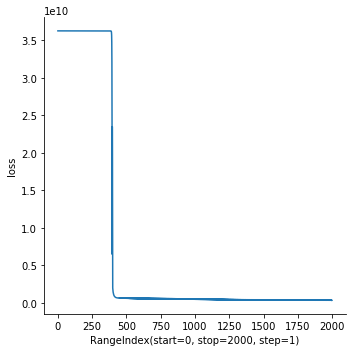

In [7]:
if keras_actif:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Input
    from tensorflow.keras.layers import Dense
    model = Sequential()
    model = Sequential([
#         Input(shape=X_train.shape[1:]),
        Dense(200, input_dim=36, kernel_initializer='normal', activation='relu'),
        Dense(100, kernel_initializer='normal', activation='relu'),
        Dense(50, kernel_initializer='normal', activation='relu'),
        Dense(25, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal')
    ])

    
    from tensorflow.keras.optimizers import Adadelta
    model.compile(loss='mean_squared_error', optimizer=Adadelta())
    
#     from tensorflow.keras.optimizers import SGD
#     LEARNING_RATE = 0.001
#     model.compile(loss='mean_squared_error', optimizer=SGD(lr=LEARNING_RATE))

    BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
    EPOCHS = 2000 # how many iterations over the whole dataset
    history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
    print(history)
    hist = pd.DataFrame(history.history)
    sns.relplot(x=hist.index, y="loss", kind="line", data=hist)

## XGBoost

In [8]:
if xgb_actif:
    import xgboost as xgb
    xgb_model = xgb.XGBRegressor()
    XgBoost = xgb_model.fit(X_train, Y_train)

## Prepare for Kaggle submisison

In [9]:
data_test= pd.read_csv('sources/test.csv')
id_from_data_test = data_test['Id']

data_test = data_test.select_dtypes(exclude=['object'])
data_test.fillna(0, inplace=True)

X_test = data_test.to_numpy()

print(f"X test {X_test.shape}")

X test (1459, 37)


In [10]:
X_test = scaler.transform(X_test[:,1:37]) # On applique le scaler sur les Surfaces du dataset de test (à l'excepion de l'id#colonne 1)

### Prédictions

In [11]:
if keras_actif:
    Y_test = model.predict(x=X_test)
    Y_test = np.reshape(Y_test, Y_test.shape[0],)
if xgb_actif:
    Y_test = xgb_model.predict(X_test)
    Y_test = np.reshape(Y_test, Y_test.shape[0],)

In [12]:
data_test['Id'] = id_from_data_test
data_test['SalePrice'] = Y_test
data_test.drop(data_test.columns.difference(['Id','SalePrice']), 1, inplace=True)
data_test.to_csv('storage/kaggle_submission_file.csv', index=False)